# <font color=red>**Import required libraries**</font>

In [275]:
#Import Packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import wilcoxon

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import sklearn.ensemble as ensembleTree

from sklearn.neural_network import MLPRegressor

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import graphviz 


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.utils import to_categorical, normalize

from scipy.stats import pearsonr
from numpy.random import randn
from numpy.random import seed
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS

from google.colab import files
from sklearn.model_selection import KFold

from google.colab import files
from xgboost import XGBRegressor

# <font color=red>**Diffusion of NP in polymer**</font>

In [276]:
diffusion = pd.read_csv("/content/Diffcoeff_mesh_Uzero_kD_epsilon__3DcubicNetwork.dat", sep="\s+")
diffusion.head()

mesh  Uzero  kD  epsilon         D    err(D)
0     4    -20   1      0.5  0.024063  0.051951
1     4    -20   2      0.5  0.123139  0.033278
2     4    -20   3      0.5  0.105119  0.015767
3     4    -20   4      0.5  0.022544  0.017110
4     4    -17   1      0.5  0.023854  0.055449

In [277]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D'])
diffusion_target = diffusion.loc[:,'D']

# **Exploratory Data Analysis**

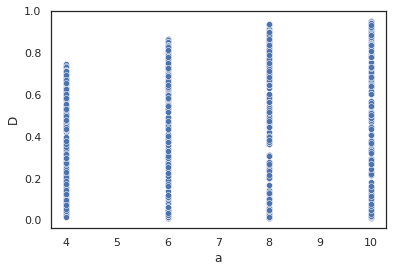

In [278]:
cmap=sns.color_palette("flare", as_cmap=True)
sns.set_style("white")
ax = sns.scatterplot(x="mesh", y="D", data=diffusion);
plt.xlabel(xlabel="a")
plt.savefig("Mesh_D.pdf")

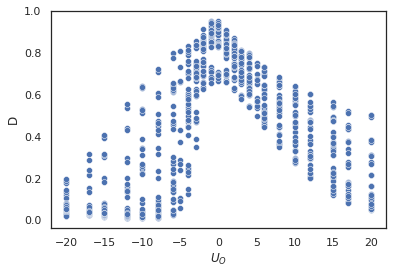

In [279]:
ax = sns.scatterplot(x="Uzero", y="D", data=diffusion);
plt.xlabel(xlabel="$U_{O}$", fontweight='bold')
plt.savefig("Uzero_D.pdf")

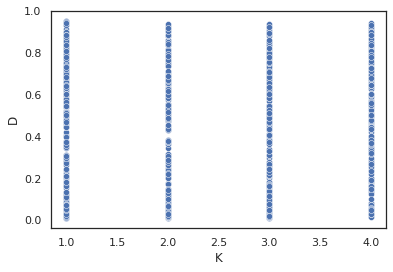

In [280]:
ax = sns.scatterplot(x="kD", y="D", data=diffusion);
plt.xlabel(xlabel="K")
plt.savefig("K_D.pdf")

In [281]:
ax = sns.scatterplot(x="epsilon", y="D", data=diffusion);
plt.xlabel(xlabel="$\epsilon$")
plt.savefig("epsilon_D.pdf")

Error in callback <function flush_figures at 0x7f6be8e490e0> (for post_execute):


KeyboardInterrupt: ignored

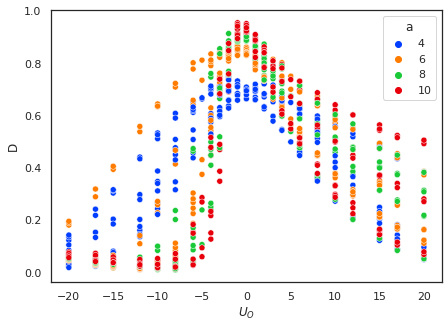

In [282]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=diffusion, x='Uzero', y='D', hue="mesh", palette="bright",ax=ax)
plt.legend(title = "a")
plt.xlabel(xlabel="$U_{O}$")
plt.savefig("mesh_uzero_D.pdf")

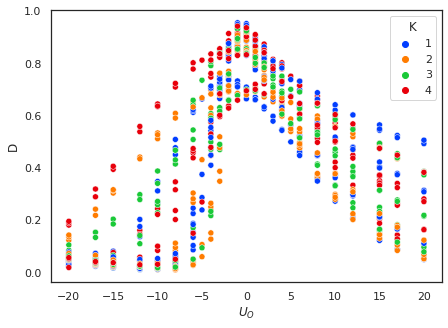

In [283]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=diffusion, x='Uzero', y='D', hue="kD",palette="bright")
plt.legend(title = "K")
plt.xlabel(xlabel="$U_{O}$")
plt.savefig("k_uzero_D.pdf")

In [284]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=diffusion, x='Uzero', y='D', hue="epsilon",palette="bright")
plt.legend(title = "$\epsilon$")
plt.xlabel(xlabel="$U_{O}$")
plt.savefig("epsilon_uzero_D.pdf")

Error in callback <function flush_figures at 0x7f6be8e490e0> (for post_execute):


KeyboardInterrupt: ignored

# **Pearson correlation coefficient**

In [285]:
pearson_diff = diffusion.corr(method='pearson')
pearson_diff

mesh         Uzero  ...         D    err(D)
mesh     1.000000e+00 -4.590312e-18  ... -0.069578  0.475407
Uzero   -4.590312e-18  1.000000e+00  ...  0.270309 -0.627948
kD       4.705790e-02  1.284310e-17  ...  0.077261 -0.028480
epsilon  1.745325e-03 -1.060366e-17  ...  0.011609 -0.011166
D       -6.957774e-02  2.703086e-01  ...  1.000000 -0.563458
err(D)   4.754068e-01 -6.279480e-01  ... -0.563458  1.000000

[6 rows x 6 columns]

# **PCA**

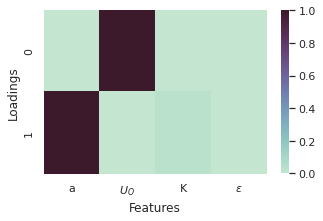

In [286]:
diffusion_attr = diffusion.drop(['D','err(D)'], axis=1)
diffusion_target = pd.DataFrame(data=diffusion['D'])

d_pca = PCA(n_components=2)

principalComponents = d_pca.fit_transform(diffusion_attr)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

PCA_df = pd.concat([principalDf, diffusion_target], axis = 1)

figure20, (ax20) = plt.subplots(1, 1, figsize=(5, 3))

cmap = sns.cubehelix_palette(start=1, rot=-.75, as_cmap=True)
influence_pca_df = pd.DataFrame(d_pca.components_,columns=['Mesh', 'Uzero', 'kD', 'Epsilon'])
sns.heatmap(influence_pca_df,cmap=cmap)

plt.xlabel(xlabel="Features")
plt.ylabel(ylabel="Loadings")
plt.xticks([0.5,1.5,2.5,3.5],labels=["a","$U_{O}$","K","$\epsilon$"], rotation=0)
plt.savefig("pca.pdf",bbox_inches='tight')

In [287]:
diffusion_sorted = diffusion
diffusion_sorted = diffusion_sorted.sort_values(by='D', ascending=True)

diffusion_sorted['Cluster'] = 0
cluster_1 = diffusion_sorted[diffusion_sorted['D'] <= 0.08]
cluster_2 = diffusion_sorted[(diffusion_sorted['D'] > 0.08)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster = pd.concat([cluster_1, cluster_2])
manual_cluster = manual_cluster.drop(columns='err(D)')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


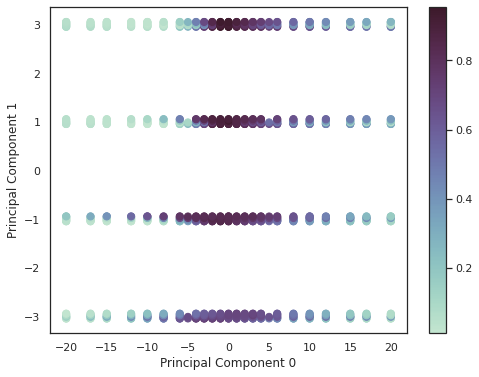

In [288]:

figure13, (ax16) = plt.subplots(1, 1, figsize=(8, 6))

points = ax16.scatter(PCA_df['principal component 1'], PCA_df['principal component 2'], c=PCA_df['D'], s=50, cmap=cmap)
ax16.set_xlabel('Principal Component 0');
ax16.set_ylabel('Principal Component 1');
#ax16.set_title('Variation of kD')
figure13.colorbar(points)
plt.savefig("pca_D_plot.png",bbox_inches='tight')


# **t-Test**

In [290]:
# Read FNT data of 30 itearions from excel sheet
fnt_30_itr = pd.read_excel ('/content/fnt-30-itr-pred.xlsx', sheet_name = None, header=None)

In [291]:
for i in range(30):
  print(metrics.r2_score(fnt_30_itr[''+str(i+1)+''][0], fnt_30_itr[''+str(i+1)+''][1]))


0.7849405210540875
0.6306596621453098
0.7209513545642812
0.713448021344876
0.727413405791634
0.7470849356507883
0.7823326974819158
0.5995511823535902
0.6886825248429308
0.6271235977189494
0.6860849993487159
0.7446544880829693
0.7419771709861602
0.7522536559460302
0.6907789049052877
0.7555234196806322
0.6572892165945441
0.6124209937991036
0.7477150167133593
0.7899169184877939
0.6812181356737983
0.8085955073721309
0.7666632158464487
0.7912488112781495
0.4754648634023364
0.7404297725244713
0.621725358965229
0.7703603474228455
0.6269623848858299
0.7486912442813513


In [292]:
fnt_features = pd.read_excel ('/content/fnt_experiment_data.xlsx', sheet_name = 'feature_fnt')
fnt_selection_rate = pd.read_excel ('/content/fnt_experiment_data.xlsx', sheet_name = 'selection_rate_fnt')

In [293]:
t_stat, p = ttest_ind(fnt_features['feature 0'], fnt_features['featuer 1'])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features['featuer 2'], fnt_features['feature 0'])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features['feature 0'], fnt_features['featuer 3 '])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features['featuer 1'], fnt_features['featuer 2'])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features['featuer 1'], fnt_features['featuer 3 '])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features['featuer 2'], fnt_features['featuer 3 '])
print(f't={t_stat}, p={p}')


t=-0.840515416523417, p=0.40407118703800304
t=-2.6714692136131712, p=0.009785956913113826
t=5.24158363361643, p=2.327260258236126e-06
t=4.139373931354185, p=0.00011418290013867985
t=7.940531229023346, p=7.705182409743373e-11
t=2.4449649266060853, p=0.017545021912023017


# **K-means**

In [294]:
diffusion_without_error = diffusion
diffusion_with_D = diffusion_without_error.drop(columns=['err(D)'])
diffusion_without_error_D = diffusion_without_error.drop(columns=['err(D)','D'])

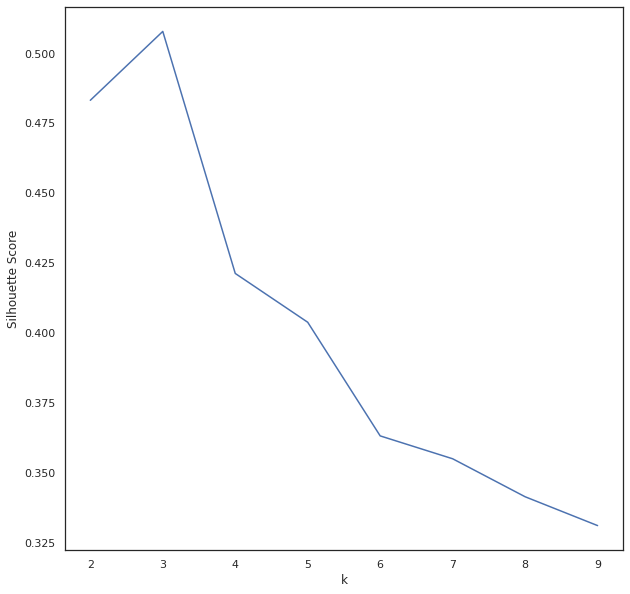

In [295]:
######################### Silhouette Score #############################

## List to store the metric value given different K values
inertia = []

#Range of the different values of K to analyse
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(diffusion_without_error)
    inertia.append(km.inertia_)

## List to store the metric value given different K values
s_score = []
#Range of the different values of K to analyse
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(diffusion_without_error)
    sil_score = silhouette_score(diffusion_without_error, kmeans.labels_)
    s_score.append(sil_score)


##Plotting the values of the metric
fig7, (ax7) = plt.subplots(1, 1, figsize=(10, 10))
ax7.plot(K, s_score)
ax7.set_xlabel('k')
ax7.set_ylabel('Silhouette Score')
fig7.savefig("kmeans_s_score_method.png", orientation='portrait', papertype=None, format="png", bbox_inches='tight')

plt.show()


In [296]:
kopt = KMeans(n_clusters=9, random_state=0)
kmeans_model = kopt.fit(diffusion_with_D)
y_kmeans_with_D = kmeans_model.predict(diffusion_with_D)
diffusion_with_D['y_kmeans_with_D'] = y_kmeans_with_D
diffusion_with_D

mesh  Uzero  kD  epsilon         D  y_kmeans_with_D
0       4    -20   1      0.5  0.024063                3
1       4    -20   2      0.5  0.123139                3
2       4    -20   3      0.5  0.105119                3
3       4    -20   4      0.5  0.022544                3
4       4    -17   1      0.5  0.023854                3
..    ...    ...  ..      ...       ...              ...
919    10     17   4      2.0  0.324121                0
920    10     20   1      2.0  0.505622                7
921    10     20   2      2.0  0.069031                7
922    10     20   3      2.0  0.078759                7
923    10     20   4      2.0  0.270787                7

[924 rows x 6 columns]

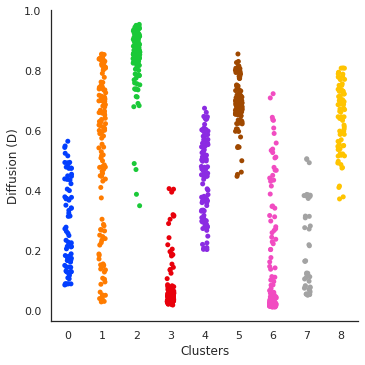

In [297]:
sns.set_style(style="white")

sns.catplot(x="y_kmeans_with_D", y="D", data=diffusion_with_D, palette="bright")
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel="Diffusion (D)")
plt.savefig("D_clusters_kmeans.png", bbox_inches='tight')

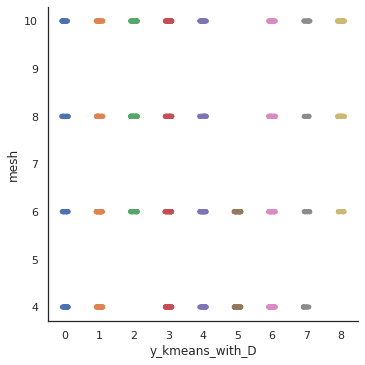

In [298]:
sns.catplot(x="y_kmeans_with_D", y="mesh", data=diffusion_with_D)


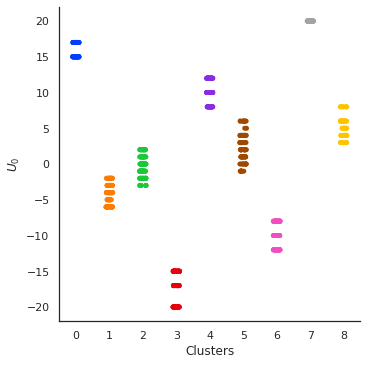

In [299]:
sns.catplot(x="y_kmeans_with_D", y="Uzero", data=diffusion_with_D, palette="bright")
sns.despine(top=True, right=True)
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel="$U_{0}$")
plt.savefig("Uzero_clusters_kmeans.png", bbox_inches='tight')

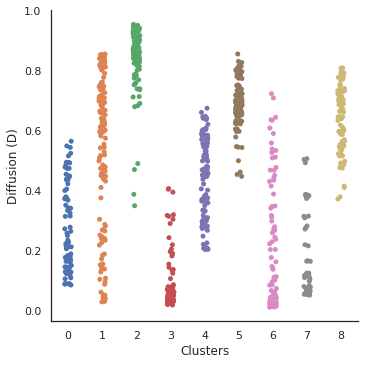

In [300]:
sns.set(font_scale=1) 
sns.set_style(style="white")
sns.catplot(x="y_kmeans_with_D", y="D", data=diffusion_with_D)
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel="Diffusion (D)")
plt.savefig("kmeans_cluster_D.pdf")

# **Manual Clustering (2 clusters)**

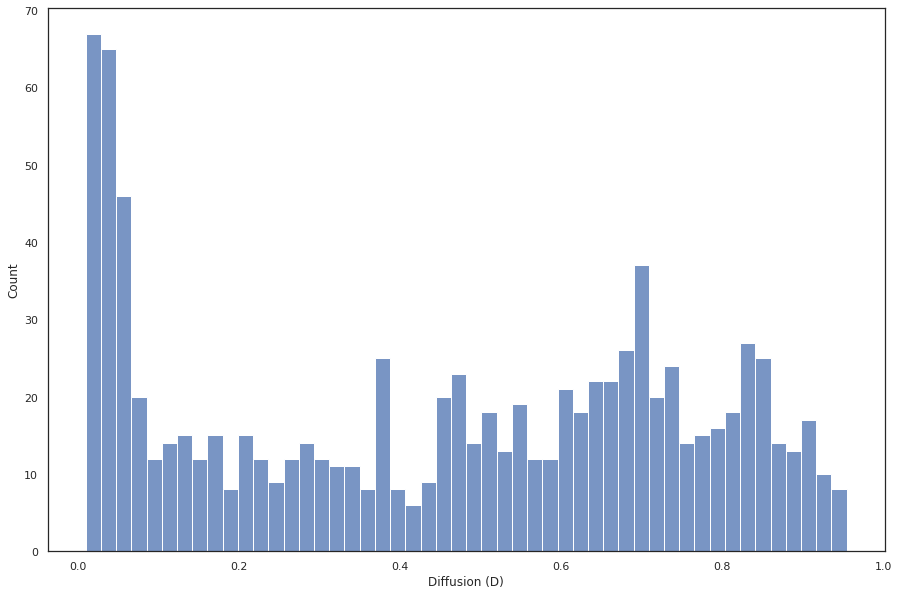

In [301]:
figure1, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=diffusion, x="D", bins=50)
plt.xlabel(xlabel="Diffusion (D)")
plt.ylabel(ylabel="Count")
plt.savefig("histplot_diffusion.pdf")

In [302]:
diffusion_sorted = diffusion
diffusion_sorted = diffusion_sorted.sort_values(by='D', ascending=True)

diffusion_sorted['Cluster'] = 0
cluster_1 = diffusion_sorted[diffusion_sorted['D'] <= 0.08]
cluster_2 = diffusion_sorted[(diffusion_sorted['D'] > 0.08)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster = pd.concat([cluster_1, cluster_2])
manual_cluster = manual_cluster.drop(columns='err(D)')

cluster_1_train = manual_cluster.loc[manual_cluster['Cluster'] == 1].sample(n=134,replace=False,random_state=99)
cluster_2_train = manual_cluster.loc[manual_cluster['Cluster'] == 2].sample(n=512,replace=False,random_state=99)

x_train_knn = pd.concat([cluster_1_train,cluster_2_train],ignore_index=False)
y_train_knn = x_train_knn['Cluster']
x_train_knn = x_train_knn.drop(columns='Cluster')

x_train_knn.index = x_train_knn.index.astype(int)
manual_cluster.index = manual_cluster.index.astype(int)
x_test_original_pred = manual_cluster[~(manual_cluster.index.isin(x_train_knn.index.values))]
y_test_knn = x_test_original_pred['Cluster']
x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


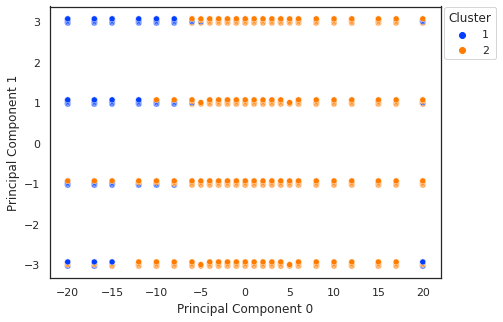

In [289]:
sns.set_style("white")
PCA_df['Cluster'] = manual_cluster['Cluster'].sort_index()

fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=PCA_df, x='principal component 1', y='principal component 2', hue="Cluster", palette="bright",ax=ax)
plt.legend(title = "Cluster", bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xlabel(xlabel="Principal Component 0")
plt.ylabel(ylabel="Principal Component 1")
plt.savefig("pca_manual_cluster_plot.pdf",bbox_inches='tight')

In [303]:
diffusion_sorted = diffusion
diffusion_sorted = diffusion_sorted.sort_values(by='D', ascending=True)

diffusion_sorted['Cluster'] = 0
cluster_1 = diffusion_sorted[diffusion_sorted['D'] <= 0.08]
cluster_2 = diffusion_sorted[(diffusion_sorted['D'] > 0.08)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster = pd.concat([cluster_1, cluster_2])
manual_cluster = manual_cluster.drop(columns='err(D)')

cluster_1_train = manual_cluster.loc[manual_cluster['Cluster'] == 1].sample(n=134,replace=False,random_state=99)
cluster_2_train = manual_cluster.loc[manual_cluster['Cluster'] == 2].sample(n=512,replace=False,random_state=99)

x_train_knn = cluster_1_train
y_train_knn = x_train_knn['Cluster']
x_train_knn = x_train_knn.drop(columns='Cluster')

x_train_knn.index = x_train_knn.index.astype(int)
manual_cluster.index = manual_cluster.index.astype(int)
x_test_original_pred = manual_cluster[~(manual_cluster.index.isin(x_train_knn.index.values))]
y_test_knn = x_test_original_pred['Cluster']
x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# **Compute average precision, recall and AUC for 4 features 30 times**

In [304]:
diffusion_sorted = diffusion
diffusion_sorted = diffusion_sorted.sort_values(by='D', ascending=True)

diffusion_sorted['Cluster'] = 0
cluster_1 = diffusion_sorted[diffusion_sorted['D'] <= 0.08]
cluster_2 = diffusion_sorted[(diffusion_sorted['D'] > 0.08)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster = pd.concat([cluster_1, cluster_2])
manual_cluster = manual_cluster.drop(columns='err(D)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


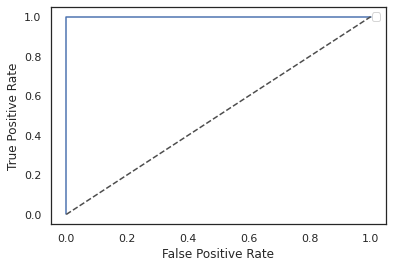

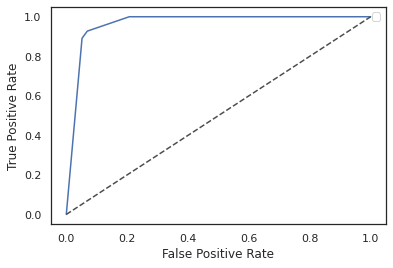

KeyboardInterrupt: ignored

In [305]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})

for i in range(30):

  cluster_1_train = manual_cluster.loc[manual_cluster['Cluster'] == 1].sample(n=134,replace=False)
  cluster_2_train = manual_cluster.loc[manual_cluster['Cluster'] == 2].sample(n=512,replace=False)

  x_train_knn = pd.concat([cluster_1_train,cluster_2_train],ignore_index=False)
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')

  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster.index = manual_cluster.index.astype(int)
  x_test_original_pred = manual_cluster[~(manual_cluster.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  if i==1:
    predcited_knn_plot = predicted_knn

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=100)

  clf_rf.fit(x_train_knn,y_train_knn)

  if i==1:
    clf_rf=RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(x_train_knn,y_train_knn)

    metrics.plot_roc_curve(clf_rf, x_test_original_pred, y_test_knn)  
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.legend([])
    plt.savefig("rf_roc_curve.png",bbox_inches="tight")

    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train_knn, y_train_knn)
    metrics.plot_roc_curve(classifier, x_test_original_pred, y_test_knn, name="")  
    plt.legend([])
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.savefig("knn_roc_curve.png",bbox_inches="tight")
    plt.show()
  
  predicted_rf = clf_rf.predict(x_test_original_pred)

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)


In [ ]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})


for i in range(30):

  cluster_1_train = manual_cluster.loc[manual_cluster['Cluster'] == 1].sample(n=134,replace=False)
  cluster_2_train = manual_cluster.loc[manual_cluster['Cluster'] == 2].sample(n=512,replace=False)

  x_train_knn = cluster_1_train
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')

  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster.index = manual_cluster.index.astype(int)
  x_test_original_pred = manual_cluster[~(manual_cluster.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=10)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=500, max_depth=10)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)
  
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)


print(auc_30_itr)

# **Compute average precision, recall and AUC for 3 features 30 times**

In [ ]:
diffusion_sorted = diffusion
diffusion_sorted = diffusion_sorted.sort_values(by='D', ascending=True)

diffusion_sorted['Cluster'] = 0
cluster_1 = diffusion_sorted[diffusion_sorted['D'] <= 0.08]
cluster_2 = diffusion_sorted[(diffusion_sorted['D'] > 0.08)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster = pd.concat([cluster_1, cluster_2])
manual_cluster = manual_cluster.drop(columns=['err(D)','epsilon'])

In [ ]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})

for i in range(30):

  cluster_1_train = manual_cluster.loc[manual_cluster['Cluster'] == 1].sample(n=134,replace=False)
  cluster_2_train = manual_cluster.loc[manual_cluster['Cluster'] == 2].sample(n=512,replace=False)

  x_train_knn = pd.concat([cluster_1_train,cluster_2_train],ignore_index=False)
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')

  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster.index = manual_cluster.index.astype(int)
  x_test_original_pred = manual_cluster[~(manual_cluster.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  if i==1:
    clf_rf=RandomForestClassifier(n_estimators=500, random_state=42)
    clf_rf.fit(x_train_knn,y_train_knn)

    metrics.plot_roc_curve(clf_rf, x_test_original_pred, y_test_knn)  
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.legend([])
    plt.savefig("rf_roc_curve_3_feat.png",bbox_inches="tight")

    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train_knn, y_train_knn)
    metrics.plot_roc_curve(classifier, x_test_original_pred, y_test_knn, name="")  
    plt.legend([])
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.savefig("knn_roc_curve_3_feat.png",bbox_inches="tight")
    plt.show()
    
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)


  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=100)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)

In [ ]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})

for i in range(30):

  cluster_1_train = manual_cluster.loc[manual_cluster['Cluster'] == 1].sample(n=134,replace=False)
  cluster_2_train = manual_cluster.loc[manual_cluster['Cluster'] == 2].sample(n=512,replace=False)

  x_train_knn = cluster_1_train
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')

  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster.index = manual_cluster.index.astype(int)
  x_test_original_pred = manual_cluster[~(manual_cluster.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=100)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



# **Uzero, Mesh, kD and Epsilon**

In [306]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'kD':[],'epsilon':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model = ensembleTree.RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_test = model.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):  
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df = pd.concat([final_df,df])
    y_pred_train = model.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

RF_test_r2 = test_acc_per_10_fold

Average R2 :  0.9778693216707807


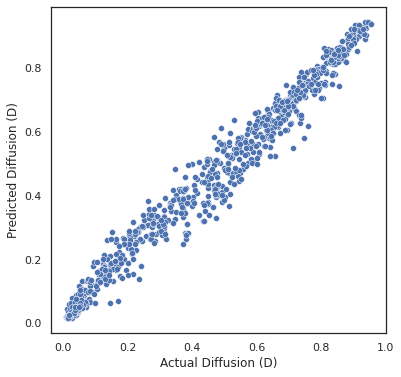

In [307]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df, x="actual", y="predicted",palette="deep")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("rf_pred_actual_diffusion_scatterplot.pdf", bbox_inches='tight')

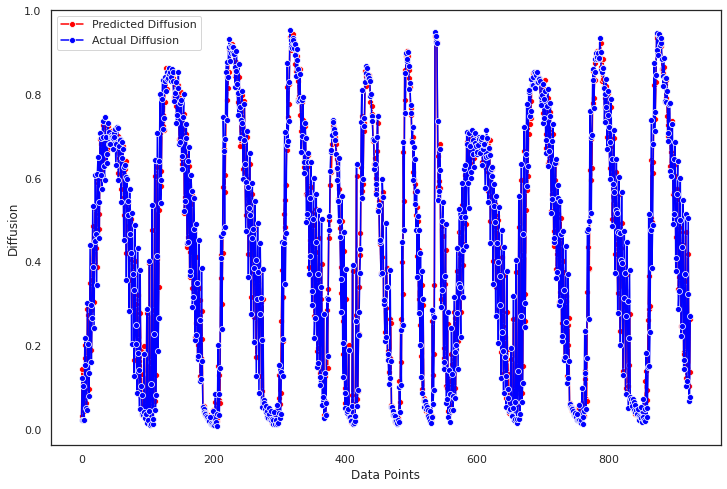

In [308]:
%matplotlib inline
sns.set()
sns.set_style(style="white")
figure5, (ax5) = plt.subplots(figsize=(12, 8))

sns.lineplot(x=final_df.index.values, y=final_df['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df.index.values, y=final_df['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"], facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("rf_pred_actual_diffusion.pdf", bbox_inches='tight')

In [309]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'kD':[],'epsilon':[],'itr': [], 'actual': [], 'predicted': []})
for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model_xgboost = XGBRegressor(random_state=42)
    model_xgboost = model_xgboost.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_test = model_xgboost.predict(inputs.loc[np.array(test).tolist()])

    if(i == 0):  
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df = pd.concat([final_df,df])
      
    y_pred_train = model_xgboost.predict(inputs.loc[np.array(train).tolist()])
    fold_no = fold_no + 1
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

XG_test_r2 = test_acc_per_10_fold

[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

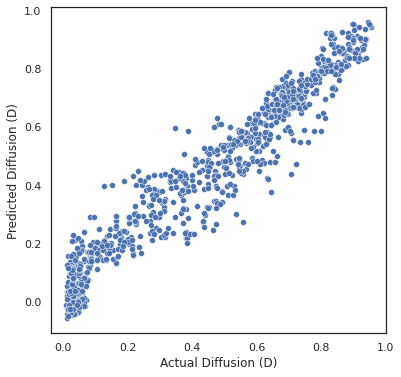

In [310]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df, x="actual", y="predicted",palette="deep")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("xg_pred_actual_diffusion_scatterplot.pdf", bbox_inches='tight')

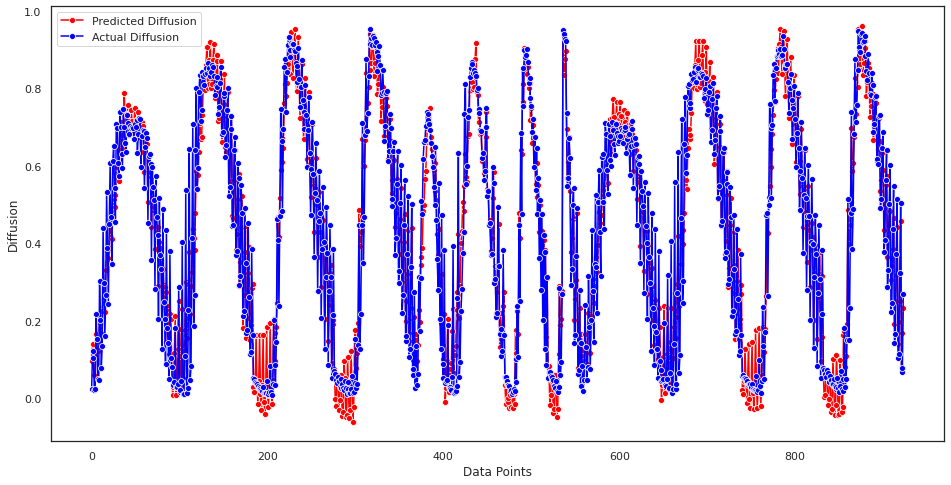

In [311]:
%matplotlib inline
sns.set()
sns.set_style(style="white")
figure5, (ax) = plt.subplots(1, 1, figsize=(16, 8))

sns.set_style(style="white")
sns.set(font_scale=1) 
sns.lineplot(x=final_df.index.values, y=final_df['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df.index.values, y=final_df['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"], loc='upper left', facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("xg_pred_actual_diffusion.pdf", bbox_inches='tight')

In [312]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'kD':[], 'kD':[],'epsilon':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    fold_no+=1
    regr_1 = DecisionTreeRegressor(max_depth=10, random_state=42)
    regr_1 = regr_1.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_DT_test = regr_1.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_DT_test
      final_df = pd.concat([final_df,df])

    y_pred_DT_train = regr_1.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_DT_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_DT_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_DT_train, squared = False))

  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)

  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

DT_test_r2 = test_acc_per_10_fold

Average R2 :  0.9678990404030204


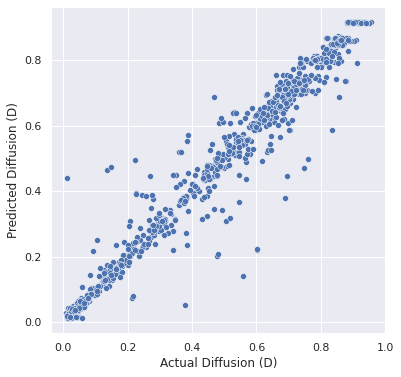

In [313]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df, x="actual", y="predicted",palette="deep")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("dt_pred_actual_diffusion_scatterplot.pdf", bbox_inches='tight')

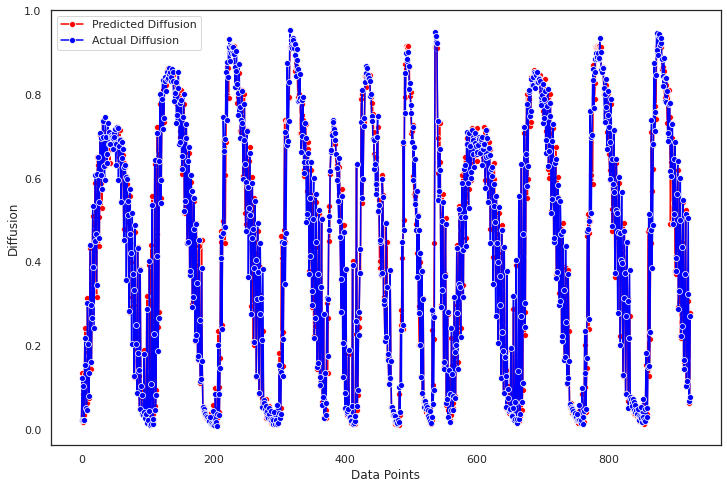

In [314]:
%matplotlib inline
sns.set()
sns.set_style(style="white")

figure5, (ax) = plt.subplots(1, 1, figsize=(12, 8))

sns.set_style(style="white")
sns.lineplot(x=final_df.index.values, y=final_df['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df.index.values, y=final_df['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"],facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("dt_pred_actual_diffusion.pdf", bbox_inches='tight')

In [315]:
df1 = pd.DataFrame(data={'DT 4 features': DT_test_r2, 'RF 4 features': RF_test_r2, 'XGBoost 4 Features': XG_test_r2})



# **Uzero, Mesh and kD**

In [316]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D','epsilon'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'kD':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):

  for train, test in kfold.split(inputs, targets):

    model = ensembleTree.RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_test = model.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df = pd.concat([final_df,df])

    y_pred_train = model.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)
RF_test_r2 = test_acc_per_10_fold

Average R2 :  0.9896556890608154


In [317]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D','epsilon'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'kD':[],'itr': [], 'actual': [], 'predicted': []})
for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model_xgboost = XGBRegressor(random_state=42)
    model_xgboost = model_xgboost.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])

    y_pred_test = model_xgboost.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df = pd.concat([final_df,df])
      
    y_pred_train = model_xgboost.predict(inputs.loc[np.array(train).tolist()])
    fold_no = fold_no + 1
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

XG_test_r2 = test_acc_per_10_fold

[20:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [318]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D','epsilon'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'kD':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    fold_no+=1

    regr_1 = DecisionTreeRegressor(max_depth=10, random_state=42)
    regr_1 = regr_1.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_DT_test = regr_1.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_DT_test
      final_df = pd.concat([final_df,df])

    y_pred_DT_train = regr_1.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_DT_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_DT_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_DT_train, squared = False))

  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)

  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

DT_test_r2 = test_acc_per_10_fold

Average R2 :  0.9836764656706732


In [319]:
df2 = pd.DataFrame(data={'DT 3 features': DT_test_r2, 'RF 3 features': RF_test_r2, 'XGBoost 3 Features': XG_test_r2})


# **Uzero and Mesh**

In [320]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D','epsilon','kD'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model = ensembleTree.RandomForestRegressor(n_estimators = 100)
    model.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_test = model.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df = pd.concat([final_df,df])
 
    y_pred_train = model.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)
RF_test_r2 = test_acc_per_10_fold

Average R2 :  0.8460969643063257


In [321]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D','epsilon','kD'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'itr': [], 'actual': [], 'predicted': []})
for i in range(30):
  for train, test in kfold.split(inputs, targets):
   
    model_xgboost = XGBRegressor()
    model_xgboost = model_xgboost.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])

    y_pred_test = model_xgboost.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df = pd.concat([final_df,df])
    
    y_pred_train = model_xgboost.predict(inputs.loc[np.array(train).tolist()])
    fold_no = fold_no + 1
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)
XG_test_r2 = test_acc_per_10_fold

[20:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [322]:
diffusion_features = diffusion
diffusion_features = diffusion_features.drop(columns=['err(D)','D','epsilon','kD'])
diffusion_target = diffusion.loc[:,'D']

inputs = diffusion_features
targets = diffusion_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df = pd.DataFrame(data={'mesh':[],'Uzero':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    fold_no+=1

    regr_1 = DecisionTreeRegressor(max_depth=10)
    regr_1 = regr_1.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_DT_test = regr_1.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_DT_test
      final_df = pd.concat([final_df,df])

    y_pred_DT_train = regr_1.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_DT_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_DT_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_DT_train, squared = False))

  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)

  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)
DT_test_r2 = test_acc_per_10_fold

Average R2 :  0.8441524900167703


In [323]:
df3 = pd.DataFrame(data={'DT 2 features': DT_test_r2, 'RF 2 features': RF_test_r2, 'XGBoost 2 Features': XG_test_r2})

In [324]:
features_based_r2_comparison = pd.concat([df1, df2, df3])
features_based_r2_comparison

DT 4 features  RF 4 features  ...  RF 2 features  XGBoost 2 Features
0        0.962167       0.979813  ...            NaN                 NaN
1        0.974564       0.978490  ...            NaN                 NaN
2        0.964707       0.978878  ...            NaN                 NaN
3        0.973237       0.979325  ...            NaN                 NaN
4        0.972218       0.976682  ...            NaN                 NaN
..            ...            ...  ...            ...                 ...
25            NaN            NaN  ...       0.846736            0.858007
26            NaN            NaN  ...       0.843144            0.856629
27            NaN            NaN  ...       0.848337            0.856618
28            NaN            NaN  ...       0.846084            0.855022
29            NaN            NaN  ...       0.844963            0.857932

[90 rows x 9 columns]

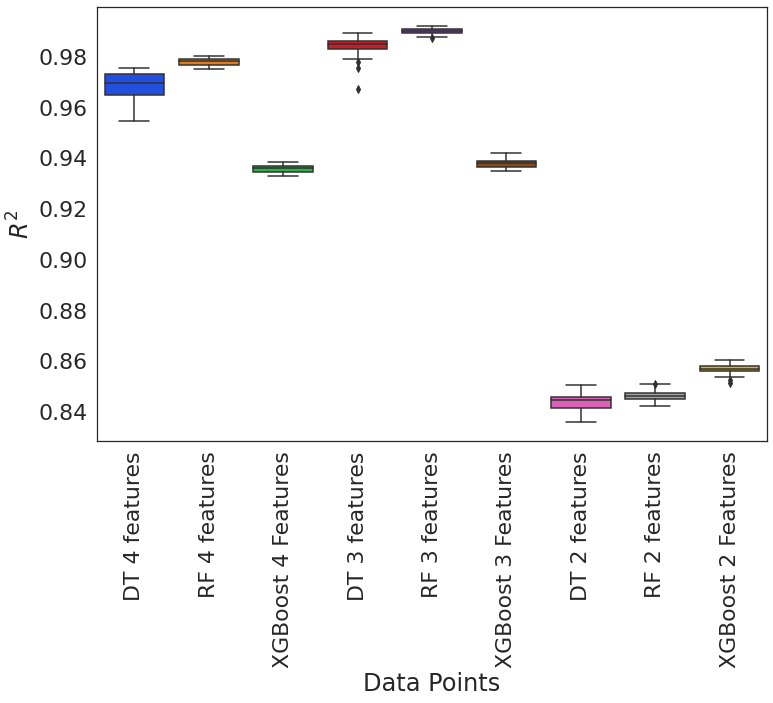

In [381]:
figure12, (ax15) = plt.subplots(1, 1, figsize=(12, 8))
sns.set(font_scale=2)
sns.set_style("white")

melt = pd.melt(features_based_r2_comparison).rename(columns = {'variable': 'Samples', 'value': 'R2'}, inplace = False)

ax = sns.boxplot(x="Samples", y="R2", data=melt, palette="bright")

ax15.set_xlabel('Data Points');
ax15.set_ylabel('$R^{2}$');
plt.xticks(rotation=90)
figure12.savefig("boxplot_all.png",bbox_inches='tight')

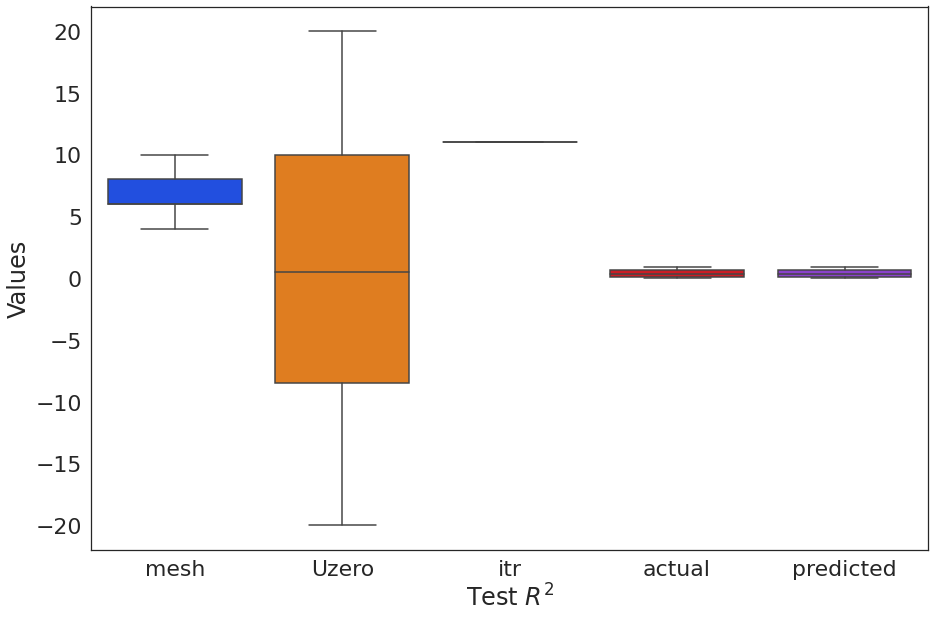

In [326]:
manual_cluster = pd.concat([df1, df2, df3])
figure12, (ax15) = plt.subplots(1, 1, figsize=(15, 10))
sns.set(font_scale=2)

melt = pd.melt(df).rename(columns = {'variable': 'R2', 'value': 'Values'}, inplace = False)

sns.boxplot(x="R2", y="Values", data=melt, palette="bright")
ax15.set_xlabel('Test $R^2$');




---



# <font color=red>**FERROFLUIDS**</font>

In [327]:
data = pd.read_excel("/content/Ferrofluids_MD_Results_July2021.xlsx", header=[1], sheet_name=None)

ferrofluids = pd.concat(data.values())
ferrofluids.dropna(inplace=True)

ferrofluids = ferrofluids.iloc[:, [0,1,2,3,6,10]]

ferrofluids = ferrofluids.rename(columns={ferrofluids.columns[0]: 'volume', 
                   ferrofluids.columns[1]: 'dipolar',
                   ferrofluids.columns[2]: 'langevin',
                   ferrofluids.columns[3]: 'avg_cluster_size',
                   ferrofluids.columns[4]: 'magnetization',
                   ferrofluids.columns[5]: 'D'
                   })

ferrofluids = ferrofluids.reset_index(drop=True)

# **Pearson correlation coefficient**

In [328]:
pearson_ferro = ferrofluids.corr(method='pearson')
pearson_ferro

volume       dipolar  ...  magnetization         D
volume            1.000000e+00 -1.823938e-16  ...       0.727877 -0.377051
dipolar          -1.823938e-16  1.000000e+00  ...       0.397148 -0.853510
langevin         -6.886967e-18 -5.509573e-18  ...       0.308093 -0.101749
avg_cluster_size  5.341246e-02  9.293108e-01  ...       0.479876 -0.902910
magnetization     7.278773e-01  3.971480e-01  ...       1.000000 -0.585915
D                -3.770510e-01 -8.535099e-01  ...      -0.585915  1.000000

[6 rows x 6 columns]

# **EDA**

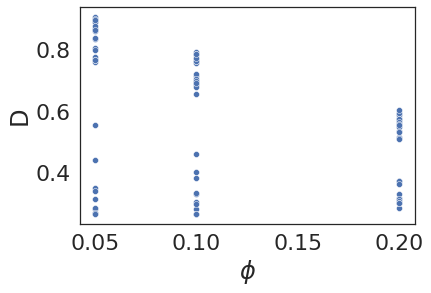

In [329]:
cmap=sns.color_palette("flare", as_cmap=True)
sns.set_style("white")
ax = sns.scatterplot(x="volume", y="D", data=ferrofluids, palette="bright");
plt.xlabel(xlabel="$\phi$")
plt.savefig("volume_D_ferro.pdf")

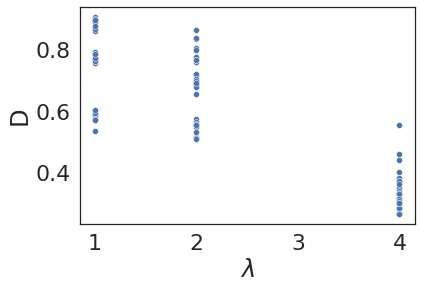

In [330]:
ax = sns.scatterplot(x="dipolar", y="D", data=ferrofluids);
plt.xlabel(xlabel="$\lambda$", fontweight='bold')
plt.savefig("dipolar_D_ferro.pdf")

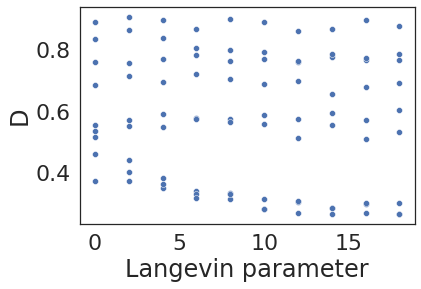

In [331]:
ax = sns.scatterplot(x="langevin", y="D", data=ferrofluids);
plt.xlabel(xlabel="Langevin parameter")
plt.savefig("langevin_D_ferro.pdf")

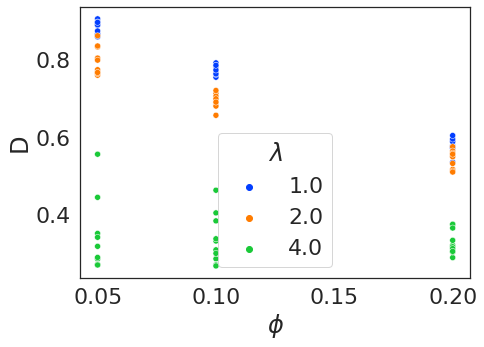

In [332]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=ferrofluids, x='volume', y='D', hue="dipolar", palette="bright",ax=ax)
plt.legend(title = "$\lambda$")
plt.xlabel(xlabel="$\phi$")
plt.savefig("volume_dipolar_D.pdf")

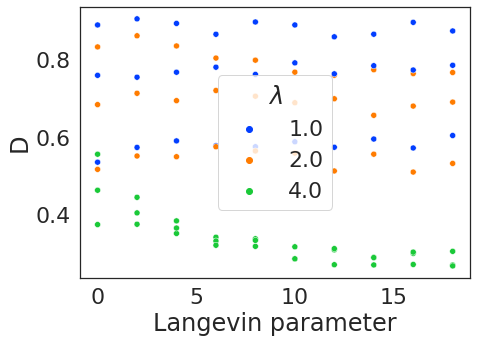

In [333]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=ferrofluids, x='langevin', y='D', hue="dipolar",palette="bright")
plt.legend(title = "$\lambda$")
plt.xlabel(xlabel="Langevin parameter")
plt.savefig("langevin_dipolar_D.pdf")

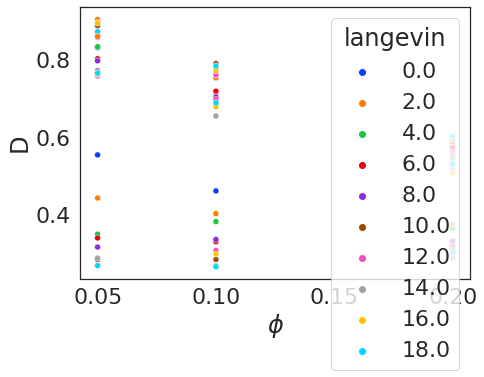

In [334]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=ferrofluids, x='volume', y='D', hue="langevin",palette="bright")
plt.legend(title = "langevin")
plt.xlabel(xlabel="$\phi$")
plt.savefig("volume_langevin_D.pdf")

# **t-Test**

In [335]:
fnt_ferrofluids_30_itr = pd.read_excel ('/content/ferrofluids_itr_30_r2.xlsx', sheet_name = None, header=None)

In [336]:
for i in range(30):
  print(metrics.r2_score(fnt_ferrofluids_30_itr[''+str(i+1)+''][0], fnt_ferrofluids_30_itr[''+str(i+1)+''][1]))

0.9493713590403569
0.8995949414266673
0.8940342394573113
0.9519801247772901
0.9089130385485852
0.9500971010400143
0.9562638244130053
0.9519262148120848
0.9566671793692342
0.9538208320092886
0.9800800660604748
0.9383958894538349
0.9136335331281713
0.94545539393247
0.958517743912113
0.9449742764767318
0.9568374571503587
0.9480886481089154
0.9481620929195227
0.9513575160839808
0.9530201352764254
0.9555599246045144
0.9570590274223303
0.9495985135875241
0.948744159278189
0.9448898537593651
0.9777386645203554
0.9557274317483242
0.9541684402728836
0.9553878162594018


In [337]:
fnt_features_ferrofluids = pd.read_excel ('/content/fnt_ferrofluids_experiment_data.xlsx', sheet_name = 'feature_fnt')
fnt_selection_rate_ferrofluids = pd.read_excel ('/content/fnt_ferrofluids_experiment_data.xlsx', sheet_name = 'selection_rate_fnt')

In [338]:
t_stat, p = ttest_ind(fnt_features_ferrofluids['feature_0'], fnt_features_ferrofluids['feature_1'])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features_ferrofluids['feature_0'], fnt_features_ferrofluids['feature_2'])
print(f't={t_stat}, p={p}')
t_stat, p = ttest_ind(fnt_features_ferrofluids['feature_1'], fnt_features_ferrofluids['feature_2'])
print(f't={t_stat}, p={p}')

t=-1.2783229998560346, p=0.20622755905733794
t=7.1649637265175405, p=1.5484073570418514e-09
t=9.601038402557874, p=1.372661002339631e-13


# **Kmeans**

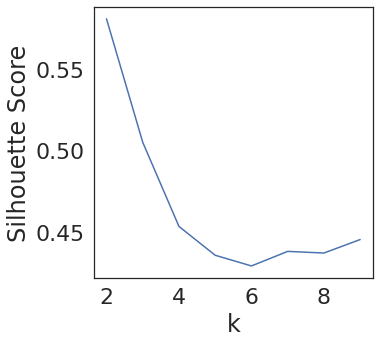

In [339]:
ferro_D_and_features = ferrofluids.copy(deep=True)
ferro_D_and_features = ferro_D_and_features.drop(columns=['avg_cluster_size','magnetization'])
## List to store the metric value given different K values
inertia = []

######################### Silhouette Score #############################
## List to store the metric value given different K values
s_score = []
#Range of the different values of K to analyse
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ferro_D_and_features)
    sil_score = silhouette_score(ferro_D_and_features, kmeans.labels_)
    s_score.append(sil_score)

fig7, (ax7) = plt.subplots(1, 1, figsize=(5, 5))
ax7.plot(K, s_score)
ax7.set_xlabel('k')
ax7.set_ylabel('Silhouette Score')
fig7.savefig("kmeans_s_score_method_ferro.png", orientation='portrait', papertype=None, format="png", bbox_inches='tight')
plt.show()


In [340]:
kopt = KMeans(n_clusters=6, random_state=0)
kmeans_model = kopt.fit(ferro_D_and_features)
y_kmeans_ferrofluids = kmeans_model.predict(ferro_D_and_features)
ferrofluids_kmeans = ferro_D_and_features.copy(deep=True)
ferrofluids_kmeans['Cluster'] = y_kmeans_ferrofluids
ferrofluids['kmeans'] = y_kmeans_ferrofluids

In [341]:
sns.set(font_scale = 1)

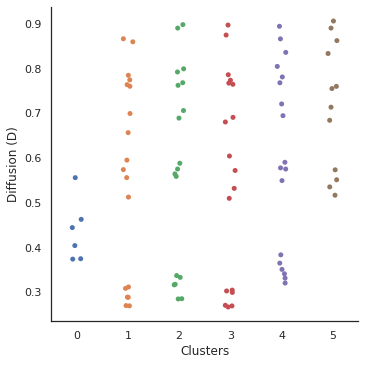

In [342]:
sns.set_style(style="white")

sns.catplot(x="Cluster", y="D", data=ferrofluids_kmeans)
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel="Diffusion (D)")
plt.savefig("cluster_d_ferro.png", bbox_inches='tight')

Text(1.9599999999999937, 0.5, 'Volume')

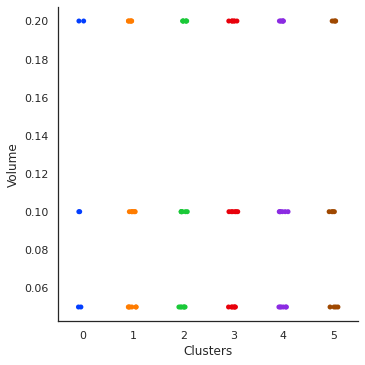

In [343]:
sns.set_style(style="white")

sns.catplot(x="Cluster", y="volume", data=ferrofluids_kmeans, palette="bright")
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel="Volume")

Text(8.959999999999994, 0.5, 'Dipolar')

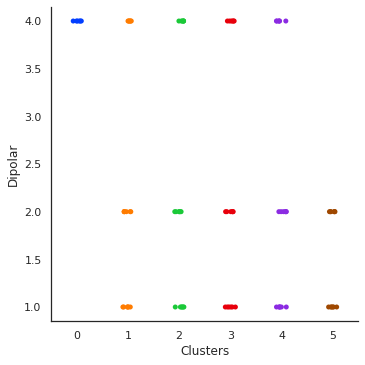

In [344]:
sns.set_style(style="white")

sns.catplot(x="Cluster", y="dipolar", data=ferrofluids_kmeans,  palette="bright")
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel="Dipolar")

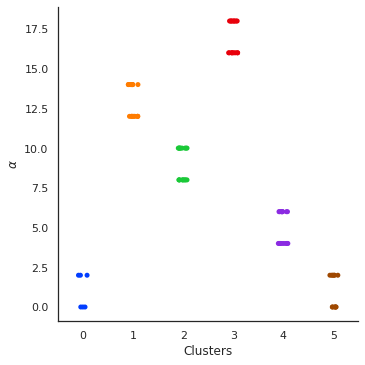

In [345]:
sns.set_style(style="white")

sns.catplot(x="Cluster", y="langevin", data=ferrofluids_kmeans, palette="bright")
plt.xlabel(xlabel="Clusters")
plt.ylabel(ylabel=r"$\alpha$")
plt.savefig("cluster_alpha_ferro.png", bbox_inches='tight')

# **PCA**

In [346]:

ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids[['volume','dipolar','langevin']]

d_pca = PCA(n_components=2, random_state=42)

principalComponents = d_pca.fit_transform(ferrofluids_attr)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
PCA_df = pd.concat([principalDf, ferrofluids_target], axis = 1)

In [347]:
d_pca.components_

array([[-0.00000000e+00,  1.11022302e-16,  1.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00, -1.11022302e-16]])

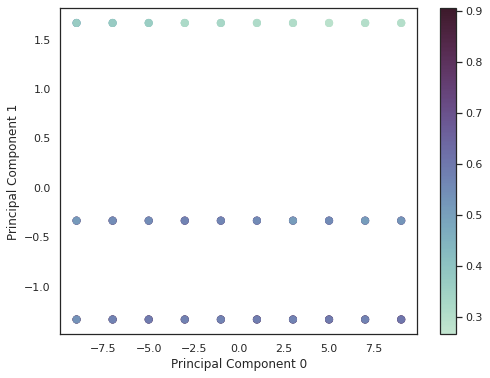

In [348]:

figure13, (ax16) = plt.subplots(1, 1, figsize=(8, 6))
cmap = sns.cubehelix_palette(start=1, rot=-.75, as_cmap=True)
points = ax16.scatter(PCA_df['principal component 1'], PCA_df['principal component 2'], c=PCA_df['D'], s=50, cmap=cmap)
ax16.set_xlabel('Principal Component 0');
ax16.set_ylabel('Principal Component 1');
#plt.text(fontsize=15)
#ax16.set_title('Variation of kD')
figure13.colorbar(points)
plt.savefig("pca_D_plot_ferro.png",bbox_inches='tight')


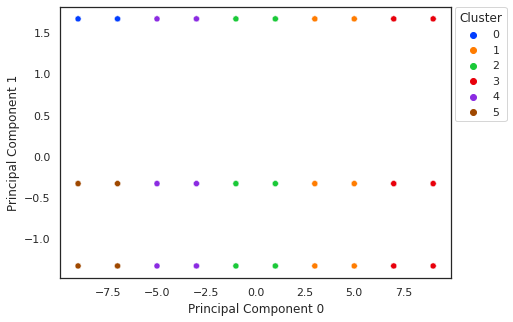

In [349]:
PCA_df['Cluster'] = ferrofluids_kmeans['Cluster'].sort_index()

fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=PCA_df, x='principal component 1', y='principal component 2', hue="Cluster", palette="bright",ax=ax)
plt.legend(title = "Cluster", bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xlabel(xlabel="Principal Component 0")
plt.ylabel(ylabel="Principal Component 1")
plt.savefig("manual_cluster_pca_ferro.png",bbox_inches='tight')

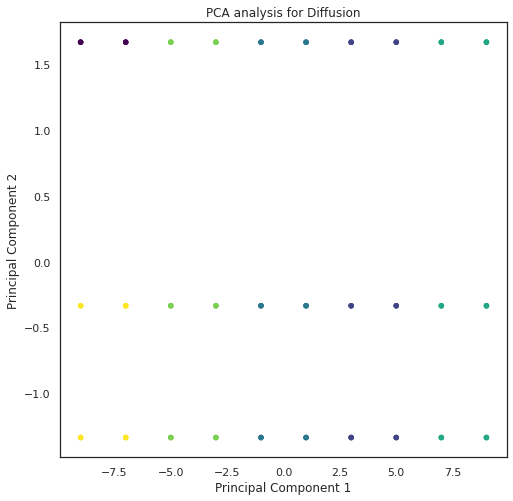

In [350]:
PCA_df['Cluster'] = ferrofluids_kmeans['Cluster'].sort_index()

figure8, (ax11) = plt.subplots(1, 1, figsize=(8, 8))
ax11.set_xlabel('Principal Component 1');
ax11.set_ylabel('Principal Component 2');
ax11.set_title('PCA analysis for Diffusion')
ax11.scatter(x='principal component 1', y='principal component 2', data=PCA_df, c='Cluster', s=20, cmap='viridis');
figure8.savefig("manual_cluster_pca.png", orientation='portrait', papertype=None, format="png")

# **Volume, dipolar, langevin**

In [352]:
ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids.loc[:,['volume','dipolar','langevin']]

inputs = ferrofluids_attr
targets = ferrofluids_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df_ferrofluids = pd.DataFrame(data={'volume':[],'dipolar':[],'langevin':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model = ensembleTree.RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_test = model.predict(inputs.loc[np.array(test).tolist()])

    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df_ferrofluids = pd.concat([final_df_ferrofluids,df])

    y_pred_train = model.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

RF_test_r2 = test_acc_per_10_fold

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed whe

Average R2 :  0.9800343978359801


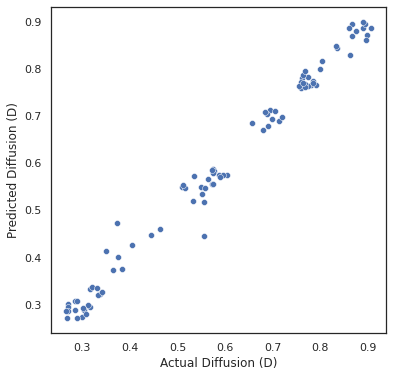

In [353]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df_ferrofluids, x="actual", y="predicted",palette="bright")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("rf_pred_actual_diffusion_scatterplot_ferro.pdf", bbox_inches='tight')

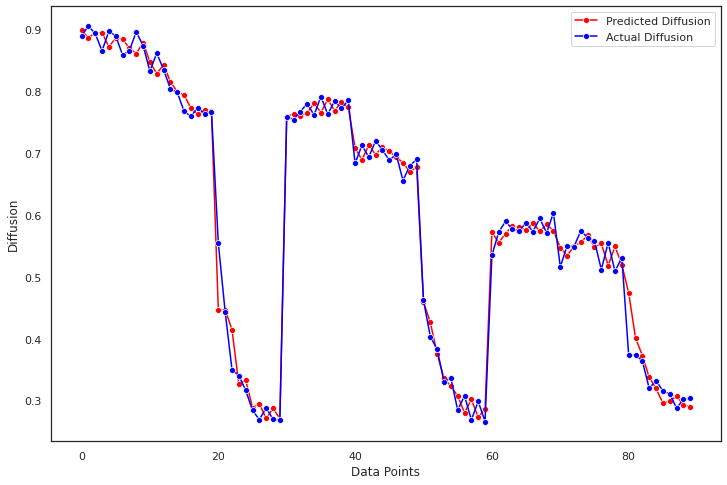

In [354]:
%matplotlib inline
sns.set()
sns.set_style(style="white")
figure5, (ax5) = plt.subplots(figsize=(12, 8))

sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"], facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("rf_pred_actual_diffusion_ferro.pdf", bbox_inches='tight')

In [355]:
ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids.loc[:,['volume','dipolar','langevin']]

inputs = ferrofluids_attr
targets = ferrofluids_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df_ferrofluids = pd.DataFrame(data={'volume':[],'dipolar':[],'langevin':[],'itr': [], 'actual': [], 'predicted': []})
for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model_xgboost = XGBRegressor(random_state=42)
    model_xgboost = model_xgboost.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])

    y_pred_test = model_xgboost.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df_ferrofluids = pd.concat([final_df_ferrofluids,df])
      
    y_pred_train = model_xgboost.predict(inputs.loc[np.array(train).tolist()])
    fold_no = fold_no + 1
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

XG_test_r2 = test_acc_per_10_fold

[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

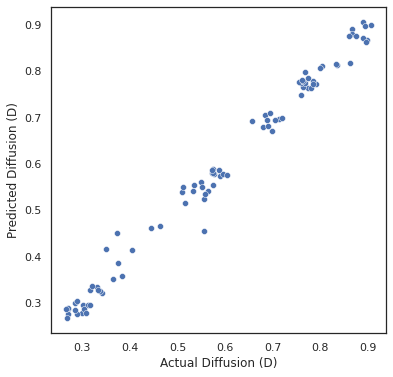

In [356]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df_ferrofluids, x="actual", y="predicted",palette="bright")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("xg_pred_actual_diffusion_scatterplot_ferro.pdf", bbox_inches='tight')

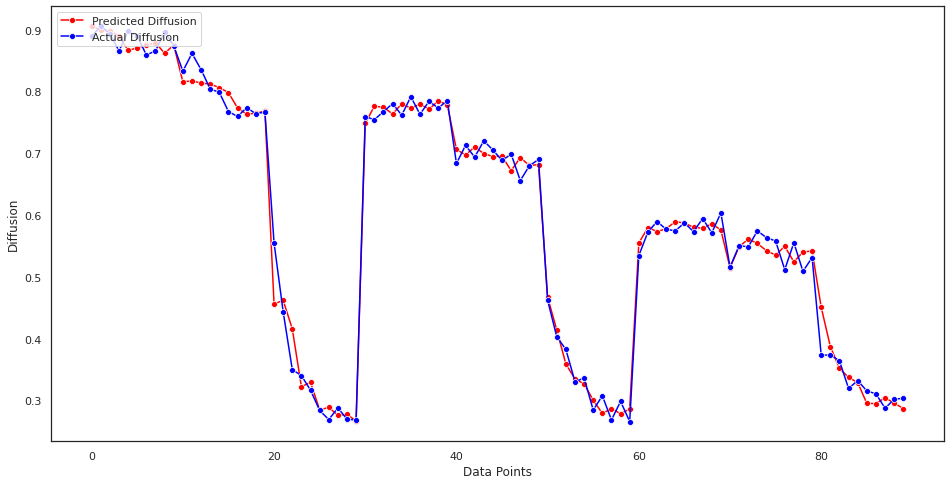

In [357]:
%matplotlib inline
sns.set()
sns.set_style(style="white")
figure5, (ax) = plt.subplots(1, 1, figsize=(16, 8))

sns.set_style(style="white")
sns.set(font_scale=1) 
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"], loc='upper left', facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("xg_pred_actual_diffusion_ferro.pdf", bbox_inches='tight')

In [358]:
ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids.loc[:,['volume','dipolar','langevin']]

inputs = ferrofluids_attr
targets = ferrofluids_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

fold_no = 1
final_df_ferrofluids = pd.DataFrame(data={'volume':[],'dipolar':[],'langevin':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  #print("i : ",i)
  for train, test in kfold.split(inputs, targets):

    fold_no+=1

    regr_1 = DecisionTreeRegressor(max_depth=10, random_state=42)
    regr_1 = regr_1.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_DT_test = regr_1.predict(inputs.loc[np.array(test).tolist()])

    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_DT_test
      final_df_ferrofluids = pd.concat([final_df_ferrofluids,df])

    y_pred_DT_train = regr_1.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_DT_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_DT_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_DT_train, squared = False))

  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)

  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

DT_test_r2 = test_acc_per_10_fold

Average R2 :  0.97155435821677


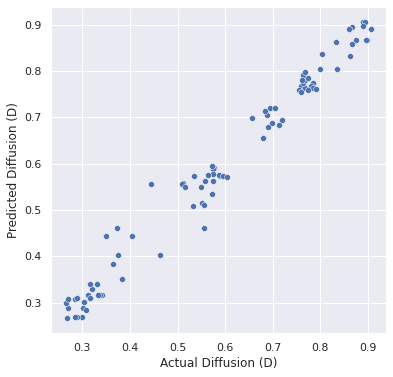

In [359]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df_ferrofluids, x="actual", y="predicted",palette="bright")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("dt_pred_actual_diffusion_scatterplot_ferro.pdf", bbox_inches='tight')

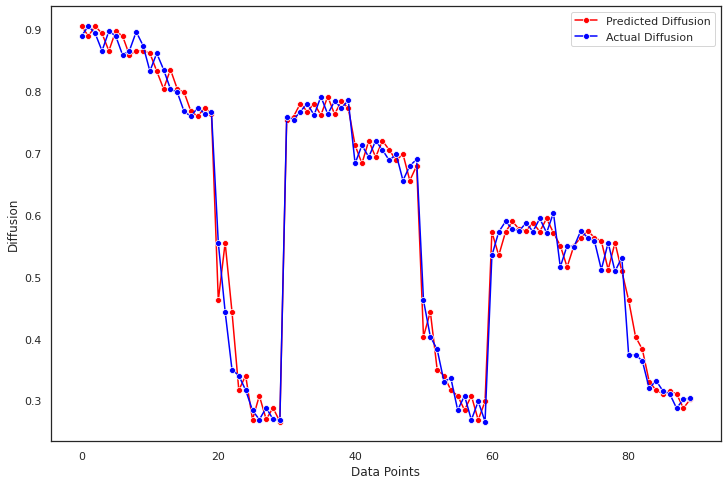

In [360]:
%matplotlib inline
sns.set()
sns.set_style(style="white")

figure5, (ax) = plt.subplots(1, 1, figsize=(12, 8))

sns.set_style(style="white")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"],facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("dt_pred_actual_diffusion_ferro.pdf", bbox_inches='tight')

In [361]:
df1 = pd.DataFrame(data={'DT 3 features': DT_test_r2, 'RF 3 features': RF_test_r2, 'XGBoost 3 Features': XG_test_r2})



# **Volume, dipolar**

In [362]:
ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids.loc[:,['volume','dipolar']]

inputs = ferrofluids_attr
targets = ferrofluids_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
final_df_ferrofluids = pd.DataFrame(data={'volume':[],'dipolar':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model = ensembleTree.RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_test = model.predict(inputs.loc[np.array(test).tolist()])

    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df_ferrofluids = pd.concat([final_df_ferrofluids,df])

    y_pred_train = model.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

RF_test_r2 = test_acc_per_10_fold

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed whe

Average R2 :  0.9354982971034848


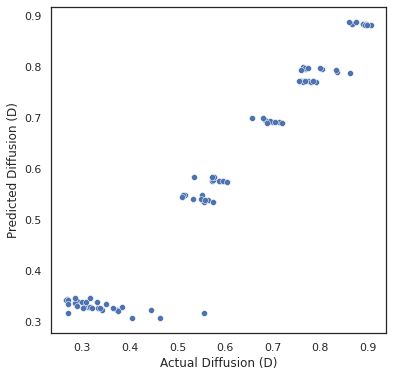

In [363]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df_ferrofluids, x="actual", y="predicted",palette="bright")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("rf_pred_actual_diffusion_scatterplot_ferro.pdf", bbox_inches='tight')

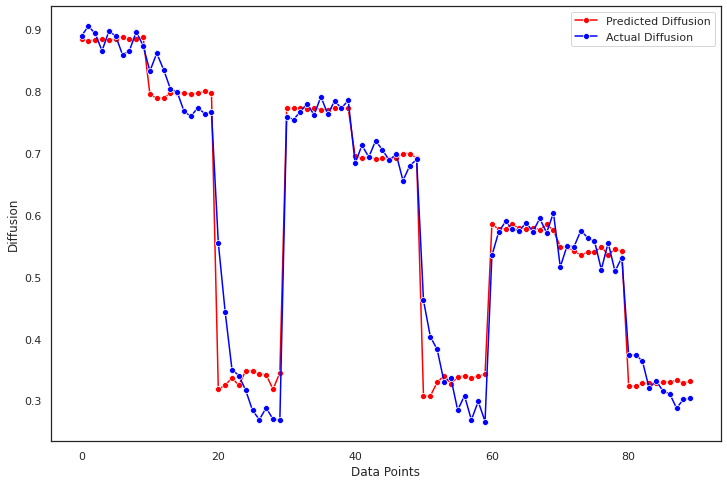

In [364]:
%matplotlib inline
sns.set()
sns.set_style(style="white")
figure5, (ax5) = plt.subplots(figsize=(12, 8))

sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"], facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("rf_pred_actual_diffusion_ferro.pdf", bbox_inches='tight')

In [382]:
ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids.loc[:,['volume','dipolar','langevin']]

inputs = ferrofluids_attr
targets = ferrofluids_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
final_df_ferrofluids = pd.DataFrame(data={'volume':[],'dipolar':[],'langevin':[],'itr': [], 'actual': [], 'predicted': []})
for i in range(30):
  for train, test in kfold.split(inputs, targets):

    model_xgboost = XGBRegressor(random_state=42)
    model_xgboost = model_xgboost.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])

    y_pred_test = model_xgboost.predict(inputs.loc[np.array(test).tolist()])
    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_test
      final_df_ferrofluids = pd.concat([final_df_ferrofluids,df])
       
    y_pred_train = model_xgboost.predict(inputs.loc[np.array(train).tolist()])
    fold_no = fold_no + 1
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_train, squared = False))
    
  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)
  
  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

XG_test_r2 = test_acc_per_10_fold

[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

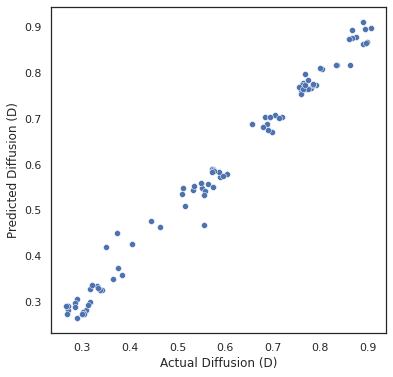

In [366]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df_ferrofluids, x="actual", y="predicted",palette="bright")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("xg_pred_actual_diffusion_scatterplot_ferro.pdf", bbox_inches='tight')

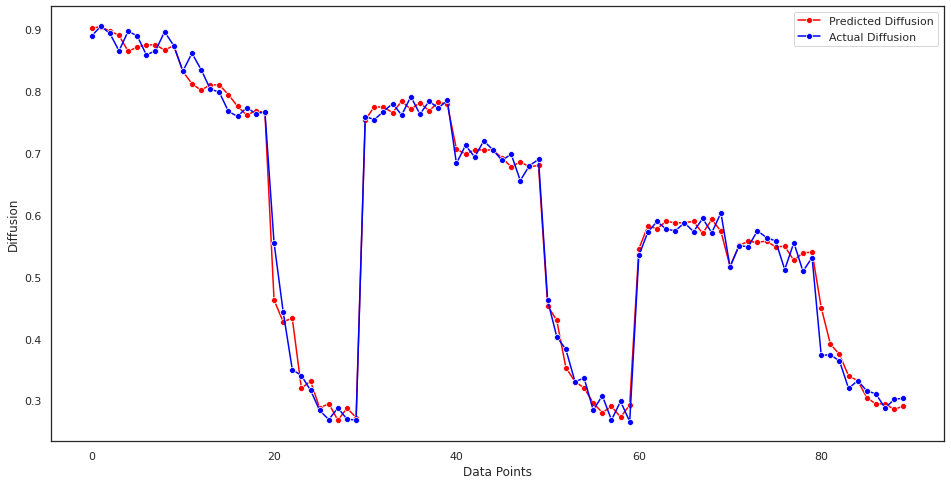

In [384]:
%matplotlib inline
sns.set()
sns.set_style(style="white")
figure5, (ax) = plt.subplots(1, 1, figsize=(16, 8))

sns.set_style(style="white")
sns.set(font_scale=1) 
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"], loc='upper right', facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("xg_pred_actual_diffusion_ferro.png", bbox_inches='tight')

In [368]:
ferrofluids_target = pd.DataFrame(data=ferrofluids['D'])
ferrofluids_attr = ferrofluids.loc[:,['volume','dipolar']]

inputs = ferrofluids_attr
targets = ferrofluids_target

test_acc_per_fold = []
train_acc_per_fold = []
train_rmse_per_fold = []

test_acc_per_10_fold = []
train_acc_per_10_fold = []
train_rmse_per_10_fold = []

loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
final_df_ferrofluids = pd.DataFrame(data={'volume':[],'dipolar':[],'itr': [], 'actual': [], 'predicted': []})

for i in range(30):
  #print("i : ",i)
  for train, test in kfold.split(inputs, targets):

    fold_no+=1

    regr_1 = DecisionTreeRegressor(max_depth=10, random_state=42)
    regr_1 = regr_1.fit(inputs.loc[np.array(train).tolist()], targets.loc[np.array(train).tolist()])
    y_pred_DT_test = regr_1.predict(inputs.loc[np.array(test).tolist()])

    if(i == 0):
      df = inputs.loc[np.array(test).tolist()]
      df['itr'] = fold_no
      df['actual'] = targets.loc[np.array(test).tolist()]
      df['predicted'] = y_pred_DT_test
      final_df_ferrofluids = pd.concat([final_df_ferrofluids,df])

    y_pred_DT_train = regr_1.predict(inputs.loc[np.array(train).tolist()])
    test_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(test).tolist()], y_pred_DT_test))
    train_acc_per_fold.append(metrics.r2_score(targets.loc[np.array(train).tolist()], y_pred_DT_train))
    train_rmse_per_fold.append(metrics.mean_squared_error(targets.loc[np.array(train).tolist()], y_pred_DT_train, squared = False))

  test_acc_per_10_fold.append(np.sum(test_acc_per_fold)/10)
  train_acc_per_10_fold.append(np.sum(train_acc_per_fold)/10)
  train_rmse_per_10_fold.append(np.sum(train_rmse_per_fold)/10)

  test_acc_per_fold = []
  train_acc_per_fold = []
  train_rmse_per_fold = []

tot_test_r2 = np.sum(test_acc_per_10_fold) / 30
tot_train_r2 = np.sum(train_acc_per_10_fold) / 30
tot_train_rmse = np.sum(train_rmse_per_10_fold) / 30

print("Average R2 : ",tot_test_r2)

DT_test_r2 = test_acc_per_10_fold

Average R2 :  0.9312661004221368


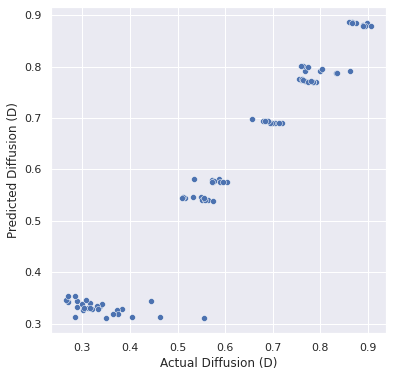

In [369]:
figure4, (ax4) = plt.subplots(1, 1, figsize=(6, 6))
sns.set_style(style="white")
sns.scatterplot(data=final_df_ferrofluids, x="actual", y="predicted",palette="bright")
plt.xlabel(xlabel="Actual Diffusion (D)")
plt.ylabel(ylabel="Predicted Diffusion (D)")
plt.savefig("dt_pred_actual_diffusion_scatterplot_ferro.pdf", bbox_inches='tight')

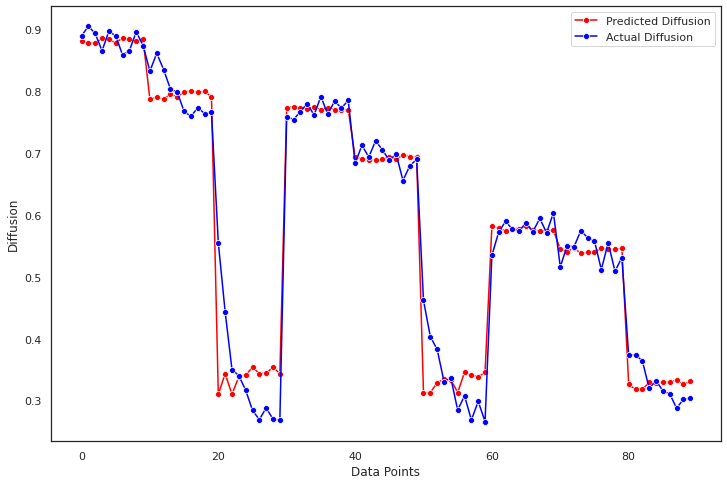

In [370]:
%matplotlib inline
sns.set()
sns.set_style(style="white")

figure5, (ax) = plt.subplots(1, 1, figsize=(12, 8))

sns.set_style(style="white")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['predicted'], marker='o', color='red', legend="auto")
sns.lineplot(x=final_df_ferrofluids.index.values, y=final_df_ferrofluids['actual'], marker='o', color='blue', legend="auto")

plt.legend(labels=["Predicted Diffusion","Actual Diffusion"],facecolor="white")
plt.xlabel(xlabel="Data Points")
plt.ylabel(ylabel="Diffusion")
plt.savefig("dt_pred_actual_diffusion_ferro.pdf", bbox_inches='tight')

In [371]:
df2 = pd.DataFrame(data={'DT 2 features': DT_test_r2, 'RF 2 features': RF_test_r2, 'XGBoost 2 Features': XG_test_r2})

In [372]:
features_based_r2_comparison_ferrofluids = pd.concat([df1, df2])
features_based_r2_comparison_ferrofluids

DT 3 features  RF 3 features  ...  RF 2 features  XGBoost 2 Features
0        0.974930       0.984328  ...            NaN                 NaN
1        0.973881       0.977535  ...            NaN                 NaN
2        0.973584       0.981747  ...            NaN                 NaN
3        0.976571       0.985163  ...            NaN                 NaN
4        0.972385       0.978612  ...            NaN                 NaN
5        0.973944       0.983038  ...            NaN                 NaN
6        0.975085       0.980572  ...            NaN                 NaN
7        0.956265       0.962400  ...            NaN                 NaN
8        0.967519       0.981983  ...            NaN                 NaN
9        0.972204       0.979012  ...            NaN                 NaN
10       0.972689       0.978931  ...            NaN                 NaN
11       0.950594       0.979977  ...            NaN                 NaN
12       0.971550       0.981246  ...            NaN                 NaN
13       0.978974       0.983712  ...            NaN                 NaN
14       0.968360       0.978493  ...            NaN                 NaN
15       0.974060       0.983719  ...            NaN                 NaN
16       0.975519       0.982914  ...            NaN                 NaN
17       0.969516       0.977551  ...            NaN                 NaN
18       0.970684       0.977227  ...            NaN                 NaN
19       0.966058       0.983577  ...            NaN                 NaN
20       0.975761       0.981531  ...            NaN                 NaN
21       0.971718       0.981083  ...            NaN                 NaN
22       0.975983       0.974478  ...            NaN                 NaN
23       0.963263       0.978541  ...            NaN                 NaN
24       0.973275       0.984658  ...            NaN                 NaN
25       0.975910       0.977767  ...            NaN                 NaN
26       0.973319       0.981188  ...            NaN                 NaN
27       0.975794       0.977768  ...            NaN                 NaN
28       0.971017       0.979379  ...            NaN                 NaN
29       0.976218       0.982903  ...            NaN                 NaN
0             NaN            NaN  ...       0.941133            0.986003
1             NaN            NaN  ...       0.947012            0.986286
2             NaN            NaN  ...       0.944251            0.984123
3             NaN            NaN  ...       0.948452            0.982057
4             NaN            NaN  ...       0.947959            0.981472
5             NaN            NaN  ...       0.872807            0.975584
6             NaN            NaN  ...       0.930893            0.982096
7             NaN            NaN  ...       0.943599            0.982306
8             NaN            NaN  ...       0.944990            0.985542
9             NaN            NaN  ...       0.938583            0.988581
10            NaN            NaN  ...       0.942388            0.984338
11            NaN            NaN  ...       0.947189            0.985223
12            NaN            NaN  ...       0.915165            0.982062
13            NaN            NaN  ...       0.933304            0.982999
14            NaN            NaN  ...       0.931990            0.983122
15            NaN            NaN  ...       0.934460            0.988069
16            NaN            NaN  ...       0.929059            0.982082
17            NaN            NaN  ...       0.947154            0.978893
18            NaN            NaN  ...       0.921654            0.983376
19            NaN            NaN  ...       0.946400            0.985715
20            NaN            NaN  ...       0.929982            0.976671
21            NaN            NaN  ...       0.949463            0.982523
22            NaN            NaN  ...       0.944286            0.983149
23            NaN            NaN  ...       0.944647          

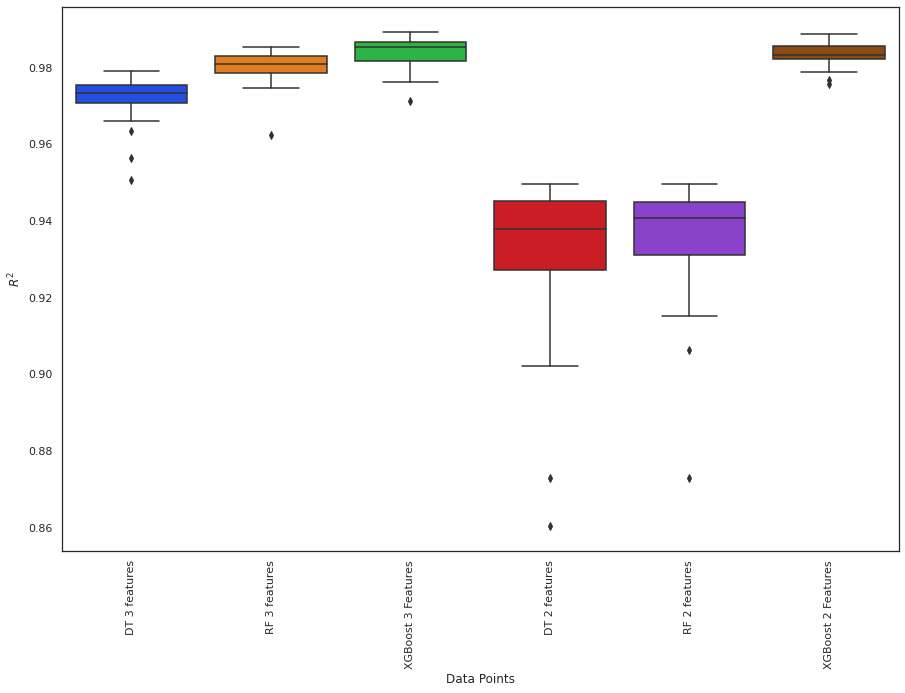

In [373]:
figure12, (ax15) = plt.subplots(1, 1, figsize=(15, 10))
sns.set(font_scale=2)
sns.set_style("white")

melt = pd.melt(features_based_r2_comparison_ferrofluids).rename(columns = {'variable': 'Samples', 'value': 'R2'}, inplace = False)
ax = sns.boxplot(x="Samples", y="R2", data=melt, palette="bright")

ax15.set_xlabel('Data Points');
ax15.set_ylabel('$R^{2}$');

plt.xticks(rotation=90)
figure12.savefig("boxplot_all_ferrofluids.pdf",bbox_inches='tight')

# **Compute average precision, recall and AUC for 3 features 30 times**

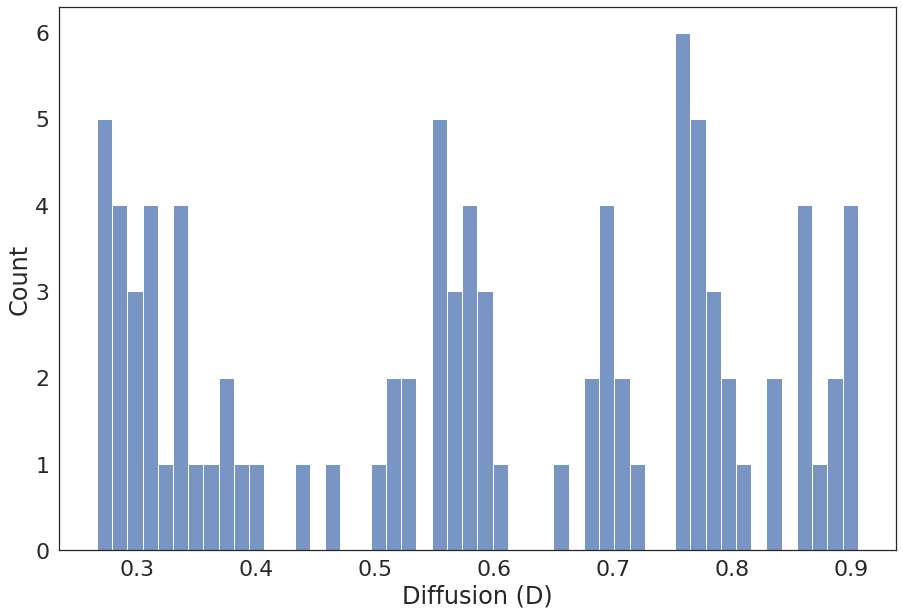

In [374]:
figure1, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=ferrofluids, x="D", bins=50)
plt.xlabel(xlabel="Diffusion (D)")
plt.ylabel(ylabel="Count")
plt.savefig("histplot_diffusion_ferro.pdf")

In [375]:
ferrofluids_sorted = ferrofluids.copy(deep=True)

ferrofluids_sorted = ferrofluids_sorted.sort_values(by='D', ascending=True)

ferrofluids_sorted['Cluster'] = 0
cluster_1 = ferrofluids_sorted[ferrofluids_sorted['D'] <= 0.6]
cluster_2 = ferrofluids_sorted[(ferrofluids_sorted['D'] > 0.6)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster_ferro = pd.concat([cluster_1, cluster_2])
manual_cluster_ferro = manual_cluster_ferro.drop(columns=['kmeans','avg_cluster_size','magnetization'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


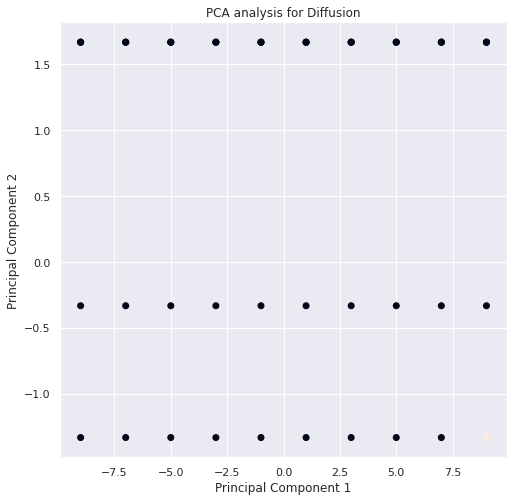

In [386]:

#manual_cluster['Cluster'] = manual_cluster['Cluster'].sort_index(self, axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
PCA_df['Cluster'] = manual_cluster_ferro['Cluster'].sort_index()

figure8, (ax11) = plt.subplots(1, 1, figsize=(8, 8))
ax11.set_xlabel('Principal Component 1');
ax11.set_ylabel('Principal Component 2');
ax11.set_title('PCA analysis for Diffusion')
ax11.scatter(x='principal component 1', y='principal component 2', data=PCA_df, c='Cluster');
figure8.savefig("manual_cluster_pca.png", orientation='portrait', papertype=None, format="png")

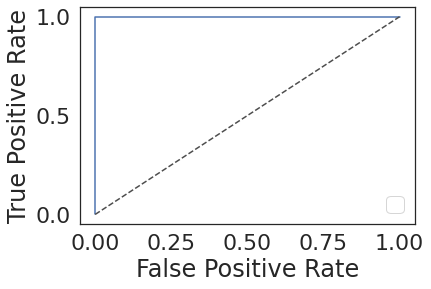

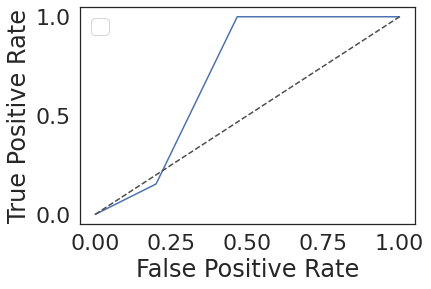

=================== RF ====================
0.9791666666666666
1.0
1.0
0.9743589743589745
=================== KNN ====================
0.8520122785138267
0.6602252155309433
0.6133333333333333
0.8512820512820515


In [376]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})

for i in range(30):

  cluster_1_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 1].sample(n=34,replace=False)
  cluster_2_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 2].sample(n=28,replace=False)

  x_train_knn = pd.concat([cluster_1_train,cluster_2_train],ignore_index=False)
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')
  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster_ferro.index = manual_cluster_ferro.index.astype(int)
  x_test_original_pred = manual_cluster_ferro[~(manual_cluster_ferro.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=3)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  if i==1:
    predcited_knn_plot = predicted_knn

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=100)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)
  if i==1:
    metrics.plot_roc_curve(clf_rf, x_test_original_pred, y_test_knn)  
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.legend([])
    plt.savefig("rf_roc_curve_ferro.png",bbox_inches="tight")

    metrics.plot_roc_curve(classifier, x_test_original_pred, y_test_knn, name="")  
    plt.legend([])
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.savefig("knn_roc_curve_ferro.png",bbox_inches="tight")
    plt.show()

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)

In [377]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})

for i in range(30):

  cluster_1_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 1].sample(n=34,replace=False)
  cluster_2_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 2].sample(n=28,replace=False)

  x_train_knn = cluster_1_train
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')
  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster_ferro.index = manual_cluster_ferro.index.astype(int)
  x_test_original_pred = manual_cluster_ferro[~(manual_cluster_ferro.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=10)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=500, max_depth=10)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

=================== RF ====================
0.26785714285714296
0.0
1.0
0.0
=================== KNN ====================
0.26785714285714296
0.0
1.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Compute average precision, recall and AUC for 2 features 30 times**

In [378]:
ferrofluids_sorted = ferrofluids.copy(deep=True)

ferrofluids_sorted = ferrofluids_sorted.sort_values(by='D', ascending=True)
ferrofluids_sorted = ferrofluids_sorted.drop(columns=['langevin'])
ferrofluids_sorted['Cluster'] = 0
cluster_1 = ferrofluids_sorted[ferrofluids_sorted['D'] <= 0.6]
cluster_2 = ferrofluids_sorted[(ferrofluids_sorted['D'] > 0.6)]

cluster_1['Cluster'] = 1
cluster_2['Cluster'] = 2

manual_cluster_ferro = pd.concat([cluster_1, cluster_2])
manual_cluster_ferro = manual_cluster_ferro.drop(columns=['kmeans','avg_cluster_size','magnetization'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


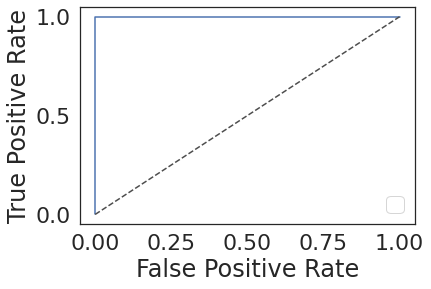

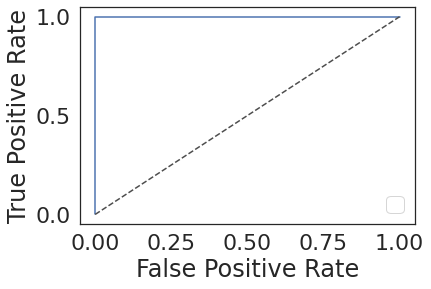

=================== RF ====================
0.9708333333333333
1.0
1.0
0.9641025641025642
=================== KNN ====================
0.9708333333333333
0.9883333333333333
0.9844444444444443
0.9641025641025642


In [379]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})

for i in range(30):

  cluster_1_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 1].sample(n=34,replace=False)
  cluster_2_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 2].sample(n=28,replace=False)
  x_train_knn = pd.concat([cluster_1_train,cluster_2_train],ignore_index=False)
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')
  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster_ferro.index = manual_cluster_ferro.index.astype(int)
  x_test_original_pred = manual_cluster_ferro[~(manual_cluster_ferro.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  if i==1:
    predcited_knn_plot = predicted_knn

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=100)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)

  if i==1:

    metrics.plot_roc_curve(clf_rf, x_test_original_pred, y_test_knn)  
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.legend([])
    plt.savefig("rf_roc_curve_2_feat_ferro.png",bbox_inches="tight")

    metrics.plot_roc_curve(classifier, x_test_original_pred, y_test_knn, name="")  
    plt.legend([])
    plt.plot([0, 1], [0, 1], ls="--", c=".3", label='Ideal')
    plt.savefig("knn_roc_curve_2_feat_ferro.png",bbox_inches="tight")
    plt.show()

  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])


class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)

In [380]:
precision_knn = []
recall_knn = []

precision_rf = []
recall_rf = []

auc_30_itr = pd.DataFrame(data={'false_positive_rate':[],'true_positive_rate':[], 'model':[]})


for i in range(30):
 
  cluster_1_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 1].sample(n=34,replace=False)
  cluster_2_train = manual_cluster_ferro.loc[manual_cluster_ferro['Cluster'] == 2].sample(n=28,replace=False)


  x_train_knn = cluster_1_train
  y_train_knn = x_train_knn['Cluster']
  x_train_knn = x_train_knn.drop(columns='Cluster')
  x_train_knn.index = x_train_knn.index.astype(int)
  manual_cluster_ferro.index = manual_cluster_ferro.index.astype(int)
  x_test_original_pred = manual_cluster_ferro[~(manual_cluster_ferro.index.isin(x_train_knn.index.values))]
  y_test_knn = x_test_original_pred['Cluster']
  x_test_original_pred = x_test_original_pred.drop(columns='Cluster')

  classifier = KNeighborsClassifier(n_neighbors=10)
  classifier.fit(x_train_knn, y_train_knn)
  predicted_knn = classifier.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_knn, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'KNN'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)

  scores_knn = metrics.precision_recall_fscore_support(y_test_knn, predicted_knn)

  precision_knn.append(scores_knn[0])
  recall_knn.append(scores_knn[1])

  clf_rf=RandomForestClassifier(n_estimators=500, max_depth=10)
  clf_rf.fit(x_train_knn,y_train_knn)

  predicted_rf = clf_rf.predict(x_test_original_pred)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_knn, predicted_rf, pos_label=2)
  new_row = {'false_positive_rate':false_positive_rate[1],'true_positive_rate':true_positive_rate[1], 'model':'RF'}
  auc_30_itr = auc_30_itr.append(new_row, ignore_index=True)
 
  scores_rf = metrics.precision_recall_fscore_support(y_test_knn, predicted_rf)

  precision_rf.append(scores_rf[0])
  recall_rf.append(scores_rf[1])

class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]

for x in precision_rf:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_rf:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== RF ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)



class_1_prec = []
class_1_rec =[]
class_2_prec = []
class_2_rec =[]


for x in precision_knn:
  class_1_prec.append(x[0]) 
  class_2_prec.append(x[1]) 

for x in recall_knn:
  class_1_rec.append(x[0]) 
  class_2_rec.append(x[1]) 

print('=================== KNN ====================')
print(np.sum(class_1_prec)/30)
print(np.sum(class_2_prec)/30)

print(np.sum(class_1_rec)/30)
print(np.sum(class_2_rec)/30)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

=================== RF ====================
0.26785714285714296
0.0
1.0
0.0
=================== KNN ====================
0.26785714285714296
0.0
1.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
